# Final Project Submission
Please fill out:

<li> Student name:Calvine Dasilver, Jack otieno , Sandra Kiptum, Salahudin Salat      and                Hellen Samuel
<li> Student pace: full time
<li> Scheduled project review date/time:
<li> Instructor name: Nikita
<li> Blog post URL:

# Predicting Future Housing Markets with Zillow's Data

## Business Understanding

#### Overview/Background Information

A real estate company is on a mission to find the hottest zip codes to invest in. They've got historical housing data from Zillow, like a time capsule, and they'll use it to predict future price trends. By analyzing this data, they want to pinpoint the top 5 zip codes with the most promising investment potential.

#### Challenges

1. Determining the "optimal" investment requires balancing the potential for profit (expected price appreciation), risk tolerance (price instability), and investment duration (holding period).
2. Real estate prices are influenced by factors beyond past data, including economic conditions, local development projects, and interest rates.
3. Time series models have limitations; they cannot ensure accurate predictions, and future market behavior is inherently uncertain.

#### Proposed Solution: Metrics of Success

To address these challenges, we propose the following approach:


1. Apply time series forecasting to the provided historical Zillow data to predict future real estate prices across different zip codes.
2. Analyze the forecasts by evaluating the profit potential, which is the expected price increase in each zip code; the risk, which involves the historical price volatility in each zip code; and the investment horizon, which refers to the planned duration of holding the investment.
3. Prioritizing investment opportunities involves analyzing forecasted prices, profit potential, and risk to identify the top 5 most promising zip codes for real estate investment.


#### Conclusion

We'll predict future real estate prices and look at how much money can be made and how risky each area is. This will help us recommend the 5 best zip codes to invest in. How well we do depends on how good our predictions are and how carefully we consider everything.

#### Objectives

1. Build a model to predict future real estate prices for different zip codes.
2. Review the predictions by looking at profit potential, risk, and how long to hold the investment.
3. Suggest the top 5 zip codes for investment based on these factors.


#### Problem Statement

Create a data-based recommendation for the top 5 zip codes the real estate investment firm should focus on, considering future price trends, risk factors, and the firm's investment timeframe.


## Data Understanding

 **Let's dive in! We'll start by loading the dataset and checking out the first few entries.**












In [2]:
import pandas as pd

# Load the dataset
data_path = "zillow_data.csv"
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
df.head()


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


To understand the data structure, we'll examine its shape (number of rows and columns), list the column names, and identify the data types for each column.

In [3]:
class RealEstateAnalyzer(object):
  """
  This class analyzes real estate data for investment purposes.
  """
  def __init__(self, data_path):
    self.data = pd.read_csv(data_path)

  def get_data_info(self):
    """
    Prints information about the data shape, column names, and data types.
    """
    print(f"Data shape (rows, columns): {self.data.shape}")
    print(f"Column names:\n{self.data.columns.tolist()}")
    print(f"Data types:\n{self.data.dtypes}")


data_path = "zillow_data.csv"  # Replace with your data path
analyzer = RealEstateAnalyzer(data_path)

analyzer.get_data_info()


Data shape (rows, columns): (14723, 272)
Column names:
['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', '1996-04', '1996-05', '1996-06', '1996-07', '1996-08', '1996-09', '1996-10', '1996-11', '1996-12', '1997-01', '1997-02', '1997-03', '1997-04', '1997-05', '1997-06', '1997-07', '1997-08', '1997-09', '1997-10', '1997-11', '1997-12', '1998-01', '1998-02', '1998-03', '1998-04', '1998-05', '1998-06', '1998-07', '1998-08', '1998-09', '1998-10', '1998-11', '1998-12', '1999-01', '1999-02', '1999-03', '1999-04', '1999-05', '1999-06', '1999-07', '1999-08', '1999-09', '1999-10', '1999-11', '1999-12', '2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06', '2000-07', '2000-08', '2000-09', '2000-10', '2000-11', '2000-12', '2001-01', '2001-02', '2001-03', '2001-04', '2001-05', '2001-06', '2001-07', '2001-08', '2001-09', '2001-10', '2001-11', '2001-12', '2002-01', '2002-02', '2002-03', '2002-04', '2002-05', '2002-06', '2002-07', '2002-08', '2002-09', '2002-10

1. The dataset contains 14,723 rows and 272 columns.

2. The dataset contains the following columns:

* RegionID: Unique identifier for the region.
* RegionName: Zip code of the region.
* City: City name.
* State: State abbreviation.
* Metro: Metro area.
* CountyName: County name.
* SizeRank: Rank by size.
* Date columns (from 1996-04 to 2018-04): Real estate prices for each month in this period.


In [4]:
class RealEstateAnalyzer:
  """Analyzes real estate data for investment."""
  def __init__(self, data_path):
    self.data = pd.read_csv(data_path)

  def get_data_type_counts(self):
    print(f"Number of features by data type:\n{self.data.dtypes.value_counts()}")

# Example usage
data_path = "zillow_data.csv"
analyzer = RealEstateAnalyzer(data_path)
analyzer.get_data_type_counts()


Number of features by data type:
float64    219
int64       49
object       4
Name: count, dtype: int64


<li> Data Types:

1. 49 columns are of type int64 (mostly identifiers).

2. 219 columns are of type float64 (real estate prices).

3. 4 columns are of type object (text data: City, State, Metro, CountyName).

In [5]:
# Display summary statistics for numerical columns
df.describe()


,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,...,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04
mean,81075.010052,48222.348706,7362.000000,1.182991e+05,1.184190e+05,1.185374e+05,1.186531e+05,1.187803e+05,1.189275e+05,1.191205e+05,...,2.733354e+05,2.748658e+05,2.764646e+05,2.780332e+05,2.795209e+05,2.810953e+05,2.826571e+05,2.843687e+05,2.865114e+05,2.880399e+05
std,31934.118525,29359.325439,4250.308342,8.600251e+04,8.615567e+04,8.630923e+04,8.646795e+04,8.665094e+04,8.687208e+04,8.715185e+04,...,3.603984e+05,3.614678e+05,3.627563e+05,3.644610e+05,3.656003e+05,3.670454e+05,3.695727e+05,3.717739e+05,3.724612e+05,3.720544e+05
min,58196.000000,1001.000000,1.000000,1.130000e+04,1.150000e+04,1.160000e+04,1.180000e+04,1.180000e+04,1.200000e+04,1.210000e+04,...,1.440000e+04,1.450000e+04,1.470000e+04,1.480000e+04,1.450000e+04,1.430000e+04,1.410000e+04,1.390000e+04,1.380000e+04,1.380000e+04
25%,67174.500000,22101.500000,3681.500000,6.880000e+04,6.890000e+04,6.910000e+04,6.920000e+04,6.937500e+04,6.950000e+04,6.960000e+04,...,1.269000e+05,1.275000e+05,1.282000e+05,1.287000e+05,1.292500e+05,1.299000e+05,1.306000e+05,1.310500e+05,1.319500e+05,1.324000e+05
50%,78007.000000,46106.000000,7362.000000,9.950000e+04,9.950000e+04,9.970000e+04,9.970000e+04,9.980000e+04,9.990000e+04,9.995000e+04,...,1.884000e+05,1.896000e+05,1.905000e+05,1.914000e+05,1.925000e+05,1.934000e+05,1.941000e+05,1.950000e+05,1.967000e+05,1.981000e+05
75%,90920.500000,75205.500000,11042.500000,1.432000e+05,1.433000e+05,1.432250e+05,1.432250e+05,1.435000e+05,1.437000e+05,1.439000e+05,...,3.050000e+05,3.066500e+05,3.085000e+05,3.098000e+05,3.117000e+05,3.134000e+05,3.151000e+05,3.168500e+05,3.188500e+05,3.211000e+05
max,753844.000000,99901.000000,14723.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


Statistical Summary:

* There's a clear upward trend in real estate prices. The average price in 1996 was around 118,299 in dollas , and by 2018, it had risen to 288,039 in dollas.
* Prices vary a lot between zip codes, showing the different types of real estate markets in each area.

## DATA CLEANING

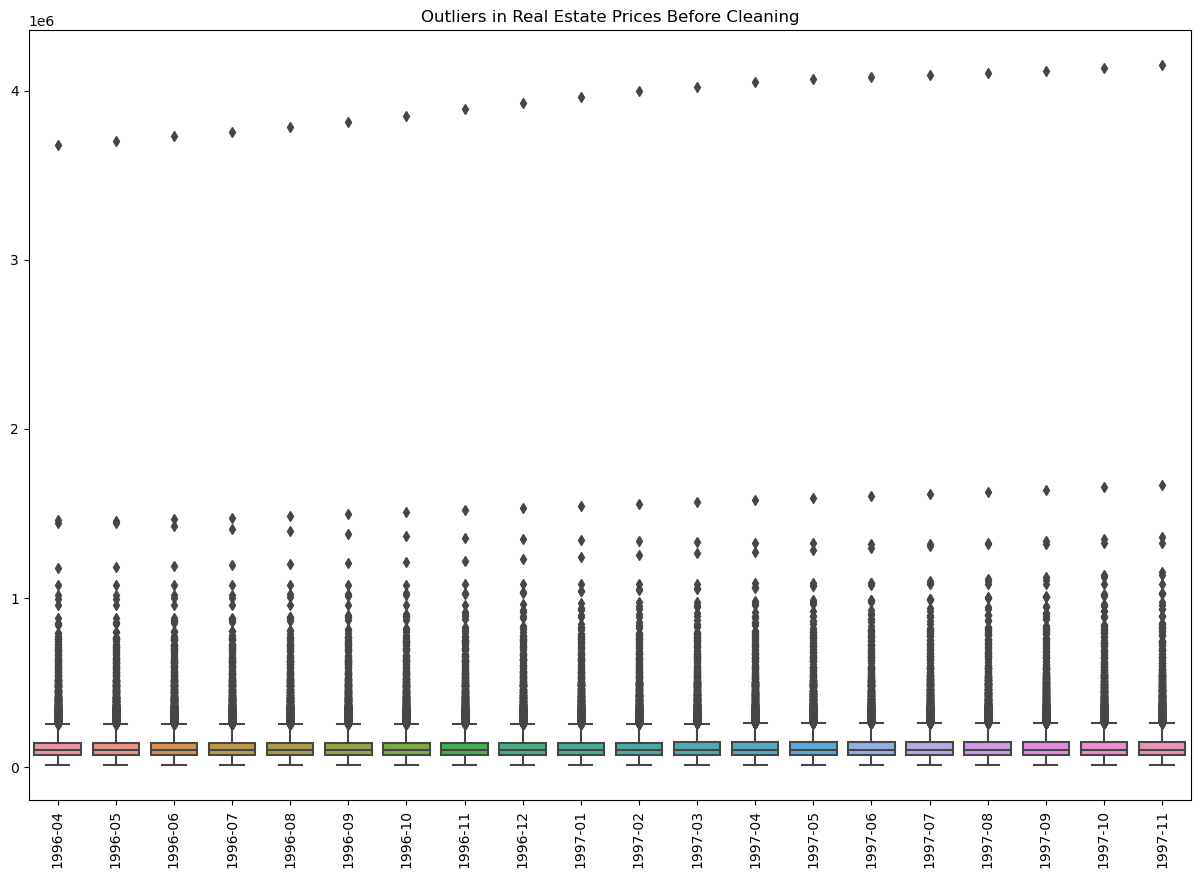

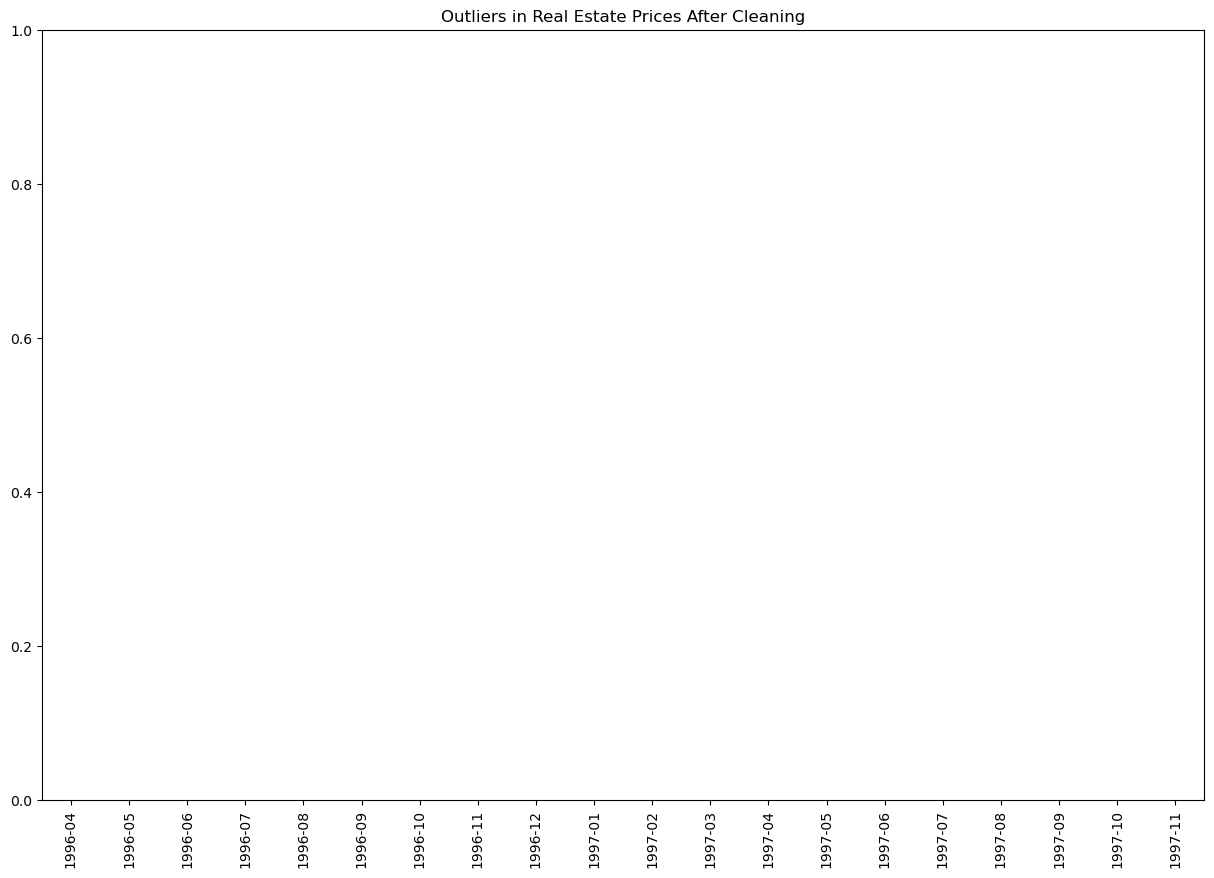

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

class RealEstateAnalyzer:
    """Analyzes real estate data for investment."""
    
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
    
    def visualize_outliers(self):
        """
        Visualizes outliers in the dataset using box plots.
        """
        # Select a subset of date columns for visualization
        date_columns = self.data.columns[7:27]  # Adjust the range as needed
        
        plt.figure(figsize=(15, 10))
        sns.boxplot(data=self.data[date_columns])
        plt.xticks(rotation=90)
        plt.title('Outliers in Real Estate Prices Before Cleaning')
        plt.show()
    
    def clean_data(self):
        """
        Cleans the data by removing outliers using the z-score method.
        """
        # Apply z-score method to remove outliers
        date_columns = self.data.columns[7:]  # All date columns
        z_scores = self.data[date_columns].apply(zscore)
        self.data = self.data[(z_scores < 3).all(axis=1)]
    
    def visualize_outliers_after_cleaning(self):
        """
        Visualizes outliers in the dataset after cleaning using box plots.
        """
        # Select a subset of date columns for visualization
        date_columns = self.data.columns[7:27]  # Adjust the range as needed
        
        plt.figure(figsize=(15, 10))
        sns.boxplot(data=self.data[date_columns])
        plt.xticks(rotation=90)
        plt.title('Outliers in Real Estate Prices After Cleaning')
        plt.show()

# Example usage
data_path = "zillow_data.csv"
analyzer = RealEstateAnalyzer(data_path)
analyzer.visualize_outliers()
analyzer.clean_data()
analyzer.visualize_outliers_after_cleaning()

## Before cleaning the data

In summary, the plot indicates that there are significant outliers in the real estate prices for each month, suggesting the presence of extreme high values. The distribution of prices is relatively consistent over time, with a positive skewness indicating more high-value outliers.


## After cleaning the data

In summary, the plot indicates that the data cleaning process has removed all outliers, resulting in an empty plot. This suggests that the z-score threshold might need to be adjusted to retain more data points while still removing extreme outliers.

# Checking for missing values

In [7]:
class RealEstateAnalyzer:
    """Analyzes real estate data for investment."""
    
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
    
    
    def check_missing_values(self):
        """
        Checks for missing and null values in the dataset.
        """
        missing_values = self.data.isnull().sum()
        print("Missing values in each column:\n", missing_values)
        total_missing = missing_values.sum()
        print(f"\nTotal missing values in the dataset: {total_missing}")

# Example usage
data_path = "zillow_data.csv"
analyzer = RealEstateAnalyzer(data_path)
analyzer.check_missing_values()

Missing values in each column:
 RegionID         0
RegionName       0
City             0
State            0
Metro         1043
              ... 
2017-12          0
2018-01          0
2018-02          0
2018-03          0
2018-04          0
Length: 272, dtype: int64

Total missing values in the dataset: 157934


## Handling missing values and null values

We'll implement a method to fill missing values with the median of each column.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

class RealEstateAnalyzer:
    """Analyzes real estate data for investment."""
    
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
    
    
    
    def check_missing_values(self):
        """
        Checks for missing and null values in the dataset.
        """
        missing_values = self.data.isnull().sum()
        print("Missing values in each column:\n", missing_values)
        total_missing = missing_values.sum()
        print(f"\nTotal missing values in the dataset: {total_missing}")
    
    def handle_missing_values(self):
        """
        Handles missing values by filling them with the median of each column.
        """
        # Separate numeric and non-numeric columns
        numeric_cols = self.data.select_dtypes(include=['number']).columns
        non_numeric_cols = self.data.select_dtypes(exclude=['number']).columns
        
        # Fill missing values in numeric columns with the median
        self.data[numeric_cols] = self.data[numeric_cols].fillna(self.data[numeric_cols].median())
        
        # Fill missing values in non-numeric columns with the mode (most frequent value)
        for col in non_numeric_cols:
            self.data[col] = self.data[col].fillna(self.data[col].mode()[0])

# Example usage
data_path = "zillow_data.csv"
analyzer = RealEstateAnalyzer(data_path)
analyzer.check_missing_values()
analyzer.handle_missing_values()
analyzer.check_missing_values()  # Check again to ensure missing values are handled

Missing values in each column:
 RegionID         0
RegionName       0
City             0
State            0
Metro         1043
              ... 
2017-12          0
2018-01          0
2018-02          0
2018-03          0
2018-04          0
Length: 272, dtype: int64

Total missing values in the dataset: 157934
Missing values in each column:
 RegionID      0
RegionName    0
City          0
State         0
Metro         0
             ..
2017-12       0
2018-01       0
2018-02       0
2018-03       0
2018-04       0
Length: 272, dtype: int64

Total missing values in the dataset: 0


## EXPLORATORY DATA ANALYSIS

Exploratory Data Analysis involves the following;

Univariate Analysis: Involves the analysis of individual variables to understand their distribution and summary statistics.

Bivariate Analysis: Involves the analysis between two variables.

Multivariate Analysis: Involves the analysis among three or more variables.

So for our case we are going to use Univariate, Bivariate and multivariate analysis.

## Univariate Analysis

Summary Statistics:
             RegionID    RegionName      SizeRank       1996-04       1996-05  \
count   14723.000000  14723.000000  14723.000000  1.368400e+04  1.368400e+04   
mean    81075.010052  48222.348706   7362.000000  1.182991e+05  1.184190e+05   
std     31934.118525  29359.325439   4250.308342  8.600251e+04  8.615567e+04   
min     58196.000000   1001.000000      1.000000  1.130000e+04  1.150000e+04   
25%     67174.500000  22101.500000   3681.500000  6.880000e+04  6.890000e+04   
50%     78007.000000  46106.000000   7362.000000  9.950000e+04  9.950000e+04   
75%     90920.500000  75205.500000  11042.500000  1.432000e+05  1.433000e+05   
max    753844.000000  99901.000000  14723.000000  3.676700e+06  3.704200e+06   

            1996-06       1996-07       1996-08       1996-09       1996-10  \
count  1.368400e+04  1.368400e+04  1.368400e+04  1.368400e+04  1.368400e+04   
mean   1.185374e+05  1.186531e+05  1.187803e+05  1.189275e+05  1.191205e+05   
std    8.630923e+04  

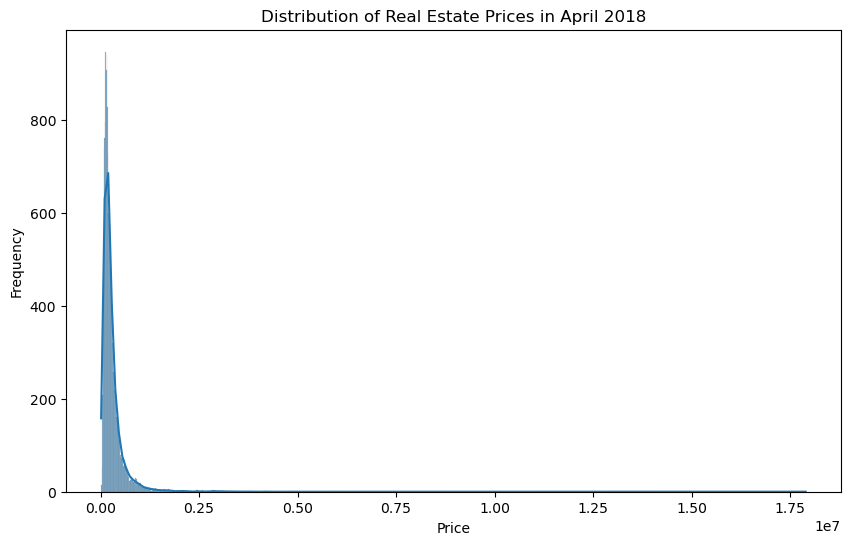

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class RealEstateAnalyzer:
    """Analyzes real estate data for investment."""
    
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
    
    def univariate_analysis(self):
        """
        Performs univariate analysis on the dataset.
        """
        # Summary statistics
        print("Summary Statistics:\n", self.data.describe())
        
        # Distribution of real estate prices for a specific month (e.g., 2018-04)
        plt.figure(figsize=(10, 6))
        sns.histplot(self.data['2018-04'], kde=True)
        plt.title('Distribution of Real Estate Prices in April 2018')
        plt.xlabel('Price')
        plt.ylabel('Frequency')
        plt.show()

# Example usage
data_path = "zillow_data.csv"
analyzer = RealEstateAnalyzer(data_path)
analyzer.univariate_analysis()

Overall, the plot shows the distribution of real estate prices in April 2018, with a large number of lower-priced properties and a small number of high-priced outliers.

## Bivariate Analysis

Summary Statistics:
             RegionID    RegionName      SizeRank       1996-04       1996-05  \
count   14723.000000  14723.000000  14723.000000  1.368400e+04  1.368400e+04   
mean    81075.010052  48222.348706   7362.000000  1.182991e+05  1.184190e+05   
std     31934.118525  29359.325439   4250.308342  8.600251e+04  8.615567e+04   
min     58196.000000   1001.000000      1.000000  1.130000e+04  1.150000e+04   
25%     67174.500000  22101.500000   3681.500000  6.880000e+04  6.890000e+04   
50%     78007.000000  46106.000000   7362.000000  9.950000e+04  9.950000e+04   
75%     90920.500000  75205.500000  11042.500000  1.432000e+05  1.433000e+05   
max    753844.000000  99901.000000  14723.000000  3.676700e+06  3.704200e+06   

            1996-06       1996-07       1996-08       1996-09       1996-10  \
count  1.368400e+04  1.368400e+04  1.368400e+04  1.368400e+04  1.368400e+04   
mean   1.185374e+05  1.186531e+05  1.187803e+05  1.189275e+05  1.191205e+05   
std    8.630923e+04  

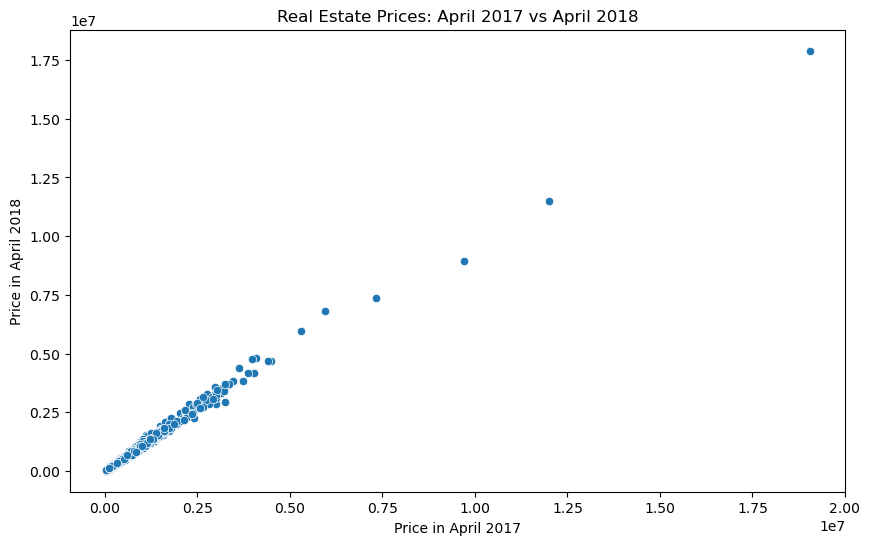

In [13]:
class RealEstateAnalyzer:
    """Analyzes real estate data for investment."""
    
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
    
    def bivariate_analysis(self):
        """
        Performs bivariate analysis on the dataset.
        """
        # Summary statistics
        print("Summary Statistics:\n", self.data.describe())
        
        # Scatter plot of real estate prices between two months (e.g., 2018-04 and 2017-04)
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=self.data['2017-04'], y=self.data['2018-04'])
        plt.title('Real Estate Prices: April 2017 vs April 2018')
        plt.xlabel('Price in April 2017')
        plt.ylabel('Price in April 2018')
        plt.show()

# Example usage
data_path = "zillow_data.csv"
analyzer = RealEstateAnalyzer(data_path)
analyzer.bivariate_analysis()

The scatter plot visualizes the relationship between real estate prices in April 2017 and April 2018.The plot shows that real estate prices in April 2017 are a good predictor of prices in April 2018, with a consistent upward trend and a few high-value outliers

## Multivariate Analysis

Summary Statistics:
             RegionID    RegionName      SizeRank       1996-04       1996-05  \
count   14723.000000  14723.000000  14723.000000  1.368400e+04  1.368400e+04   
mean    81075.010052  48222.348706   7362.000000  1.182991e+05  1.184190e+05   
std     31934.118525  29359.325439   4250.308342  8.600251e+04  8.615567e+04   
min     58196.000000   1001.000000      1.000000  1.130000e+04  1.150000e+04   
25%     67174.500000  22101.500000   3681.500000  6.880000e+04  6.890000e+04   
50%     78007.000000  46106.000000   7362.000000  9.950000e+04  9.950000e+04   
75%     90920.500000  75205.500000  11042.500000  1.432000e+05  1.433000e+05   
max    753844.000000  99901.000000  14723.000000  3.676700e+06  3.704200e+06   

            1996-06       1996-07       1996-08       1996-09       1996-10  \
count  1.368400e+04  1.368400e+04  1.368400e+04  1.368400e+04  1.368400e+04   
mean   1.185374e+05  1.186531e+05  1.187803e+05  1.189275e+05  1.191205e+05   
std    8.630923e+04  

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1500 with 0 Axes>

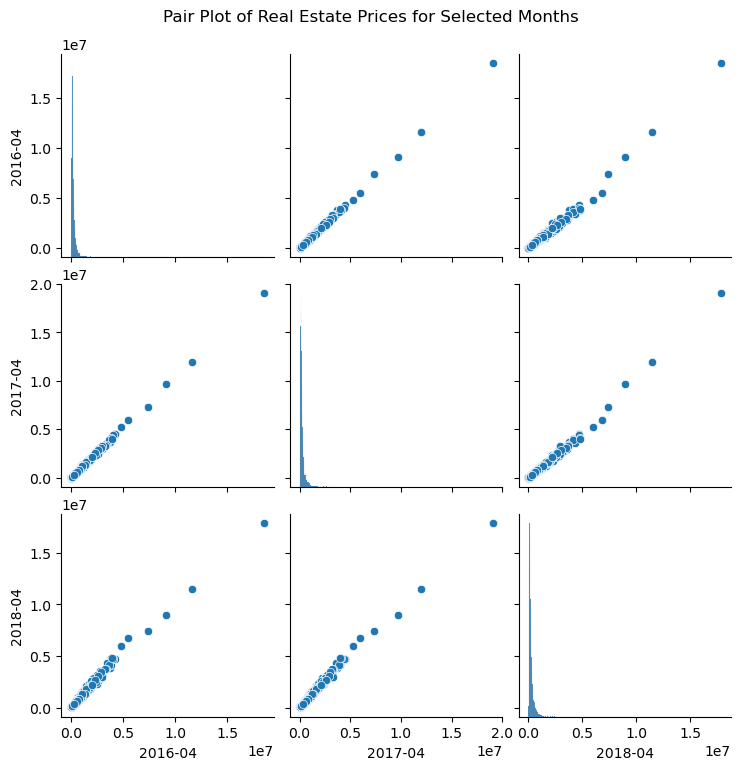

In [14]:
class RealEstateAnalyzer:
    """Analyzes real estate data for investment."""
    
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
    
    def multivariate_analysis(self):
        """
        Performs multivariate analysis on the dataset.
        """
        # Summary statistics
        print("Summary Statistics:\n", self.data.describe())
        
        # Pair plot of real estate prices for a few selected months
        selected_columns = ['2016-04', '2017-04', '2018-04']
        plt.figure(figsize=(15,15))
        sns.pairplot(self.data[selected_columns])
        plt.suptitle('Pair Plot of Real Estate Prices for Selected Months', y=1.02)
        plt.show()

# Example usage
data_path = "zillow_data.csv"
analyzer = RealEstateAnalyzer(data_path)
analyzer.multivariate_analysis()

The pair plot visualizes the relationships between real estate prices in three selected months: April 2016, April 2017, and April 2018.the pair plot shows the strong positive correlations and linear relationships between real estate prices in April 2016, April 2017, and April 2018, along with the presence of high-value outliers and the right-skewed distribution of prices.